# KF-based Alignment
Small MC-based studies

In [1]:
from _differ import Differ
%matplotlib inline
import mplhep
import matplotlib.pyplot as plt
plt.style.use(mplhep.style.ROOT)

## Single Sensor, Single Translation
As a first pass and simple confirmation of what I've done before, I am going to see how alignment goes after moving the Axial sensor in Layer 3 Top down by 69um.
Specifically, I am adding `-0.069` to the `11105` parameter in `compact.xml`.

Generally, it looks like MP is perfectly aligning the floated parameter to the naive mean of that parameter's residuals. Emphasis on naive - the simple mean is dragged towards zero (away from the actual misalignment) due to some other effect. I think that the tracks populating the near-zero residual region _could_ be tracks that simply omit the misaligned sensor.

Deduced Alignment Parameters: -49.788 -> -14.122 -> -3.6554 -> -1.0423 -> -0.27308

Total Alignment Parameter: -68.8808

In [2]:
d = Differ('L3TAxial $\Delta u = -69 \mu$m',
           ('data/kf/L3TAxial_iter0/gblplots.root','iter0 $-49.788\mu$m'),
           ('data/kf/L3TAxial_iter1/gblplots.root','iter1 $-14.122\mu$m'),
           ('data/kf/L3TAxial_iter2/gblplots.root','iter2 $-3.6554\mu$m'),
           ('data/kf/L3TAxial_iter3/gblplots.root','iter3 $-1.0423\mu$m'),           
           ('data/kf/L3TAxial_iter4/gblplots.root','iter4 $-0.27308\mu$m'),           
          )

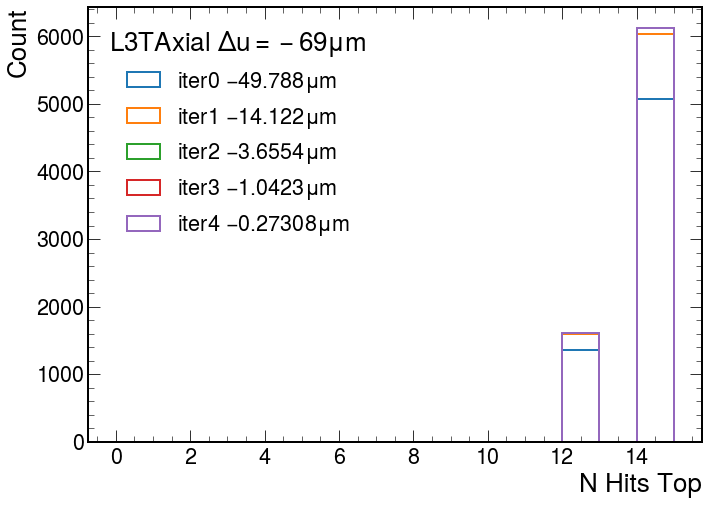

In [3]:
d.plot1d('trk_params/nHits_top','N Hits Top',ylabel='Count',yscale='linear',legend_kw=dict(loc='upper left'))

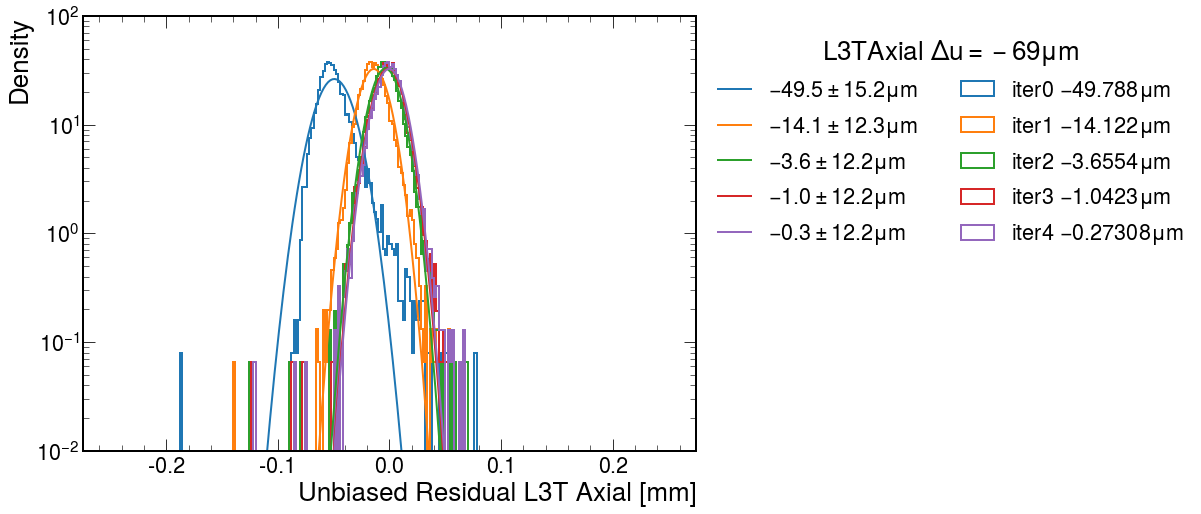

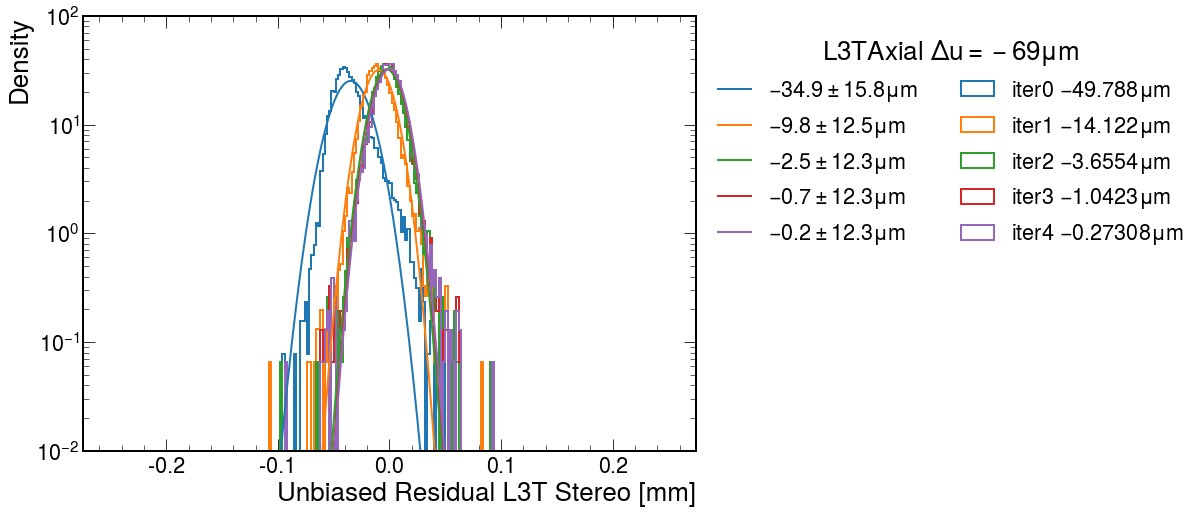

In [4]:
sensors = [
    ('L3T Axial', 'res/uresidual_GBL_module_L3t_halfmodule_axial_sensor0'),
    ('L3T Stereo', 'res/uresidual_GBL_module_L3t_halfmodule_stereo_sensor0'),
]
for name, hist in sensors :
    d.plot1d(hist, f'Unbiased Residual {name} [mm]', ylabel='Density', 
             yscale='log', ylim = (0.01,100),
             #yscale='linear',
            include_mean = 'simple', draw_mean = True, density = True,
            legend_kw=dict(loc='upper left',bbox_to_anchor=(1.,1.), ncol=2))

## Single Sensor, Rotation around W
Colloquially known as `rw`. I am going to rotate the axial sensor in Layer 4 by 10mrad. Specifically, I am add `+0.010` to the `12307` parameter in `compact.xml`.

Deduced Alignment Parameters: 6.4573 -> 2.4356 -> 0.79673 -> 0.25975

Total Alignment Parameter: 9.94938

In [4]:
d = Differ('L4T Axial rW 10 mrad',
           ('data/kf/L4TAxial_rw_iter0/gblplots.root','iter0: 6.4573 mrad'),
           ('data/kf/L4TAxial_rw_iter1/gblplots.root','iter1: 2.4356 mrad'),
           ('data/kf/L4TAxial_rw_iter2/gblplots.root','iter2: 0.79673 mrad'),
           ('data/kf/L4TAxial_rw_iter3/gblplots.root','iter3: 0.25975 mrad'),
          )

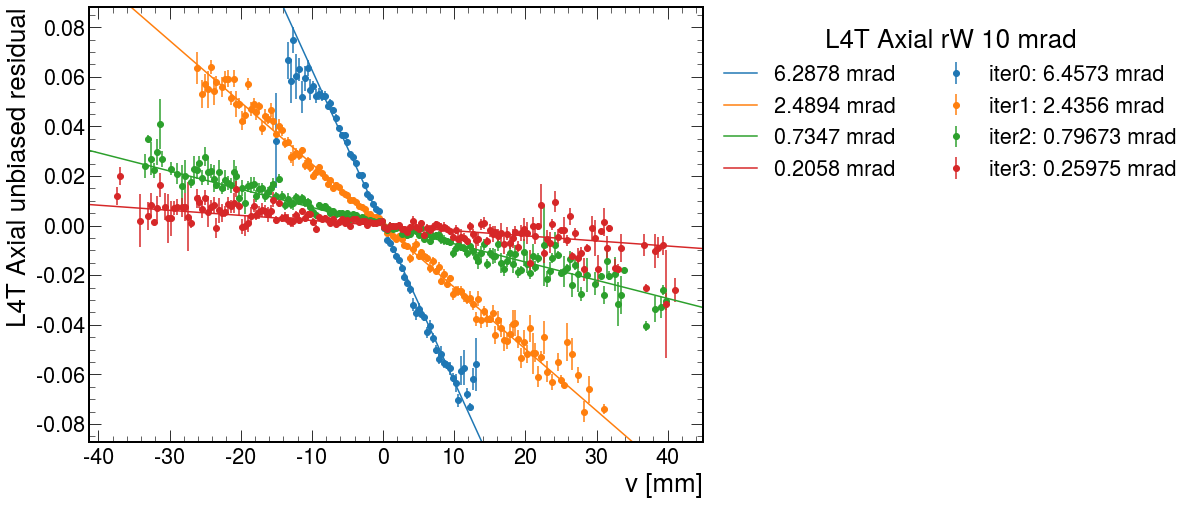

In [6]:
d.plot2d_profile_overlay('res/uresidual_GBL_vs_v_pred_module_L4t_halfmodule_axial_sensor0',
                         xlabel='v [mm]', ylabel = 'L4T Axial unbiased residual',
                         line_fit = True, draw_line = True,
                         legend_kw = dict(loc='upper left',bbox_to_anchor=(1,1),ncol=2)
                        )

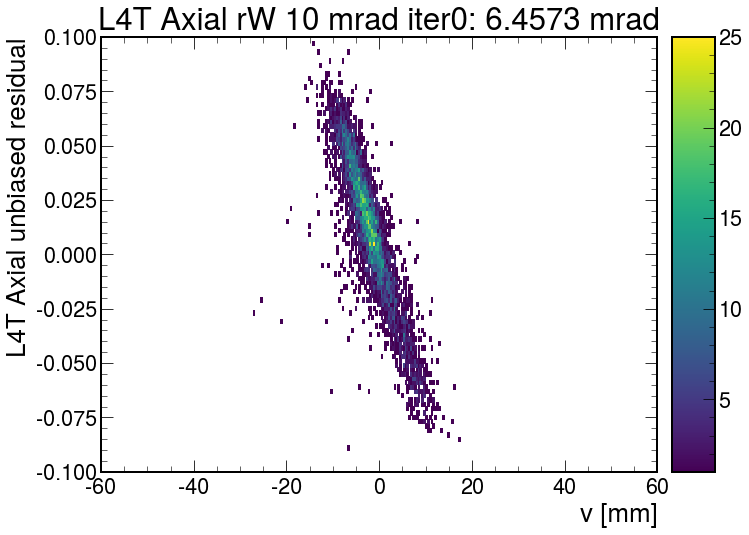

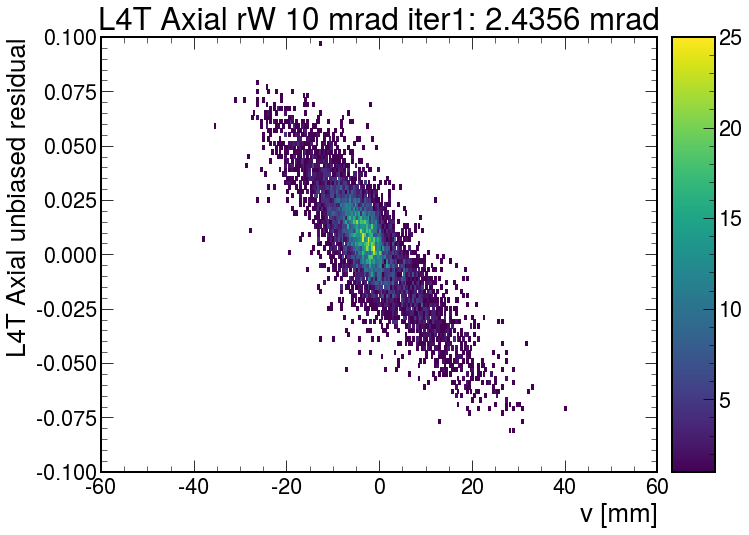

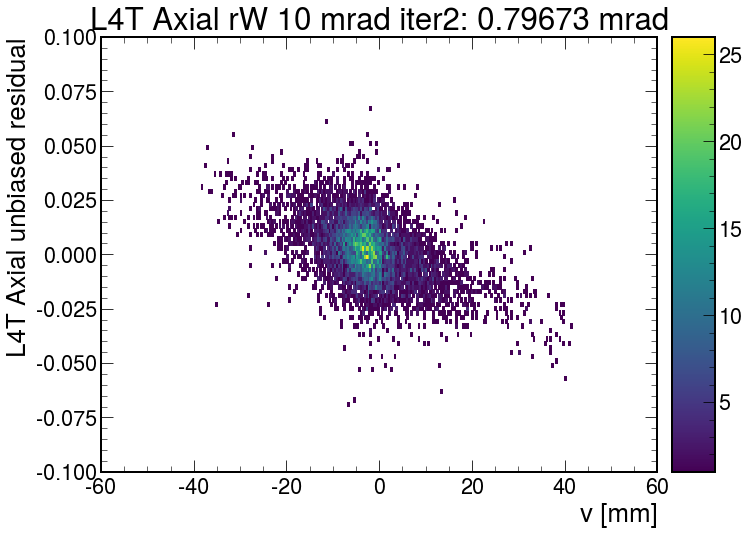

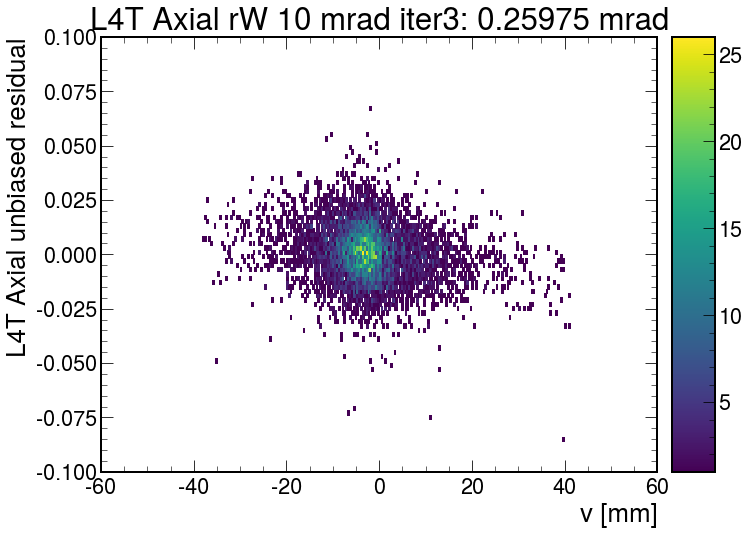

In [8]:
d.plot2d_separate('res/uresidual_GBL_vs_v_pred_module_L4t_halfmodule_axial_sensor0',
                 xlabel='v [mm]', ylabel = 'L4T Axial unbiased residual')